<a href="https://colab.research.google.com/github/Aymericy/Ustyugiov-M/blob/main/Lab_(2_1)_4_course_Ustiugov_M_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача кластеризации

#### Примеры:
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#### В Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  

Параметры:
- n_clusters – количество кластеров.
- init – способ инициализации центроидов (по умолчанию ‘k-means++’).
- n_init – количество запусков алгоритма со случайной инициализацией центроидов (по умолчанию n_init = 10).
- random_state – определяет случайность инициализации центроида.


Атрибуты:
- cluster_centers_ – координаты центров кластеров.
- labels_ – возвращает метки кластеров.
- inertia_ – сумма квадратов расстояний наблюдений до ближайшего центра кластера.

#### Прочитайте материал
https://www.dmitrymakarov.ru/intro/clustering-16/

### Задание
В файле mobile.xlsx находятся данные об абонентах телекоммуникационной
компании.  
Целью исследования является сегментация абонентской базы для разработки
новых тарифов и проведения маркетинговых акций.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('mobile.xlsx')
df

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,56,82,121.54
1,1,221,287.51
2,36,68,113.70
3,23,96,410.23
4,29,139,537.60
...,...,...,...
4487,30,66,186.20
4488,23,112,500.68
4489,5,189,470.42
4490,69,124,858.99


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Количество SMS за месяц  4492 non-null   int64  
 1   Количество звонков       4492 non-null   int64  
 2   Среднемесячный расход    4492 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 105.4 KB


In [3]:
df.describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
count,4492.000000,4492.000000,4492.000000
mean,21.243321,140.480632,506.155512
std,27.911864,91.742992,646.252023
min,0.000000,2.000000,3.180000
25%,3.000000,94.000000,152.880000
50%,6.000000,129.000000,316.960000
75%,32.000000,168.000000,600.032500
max,179.000000,635.000000,5142.760000


In [4]:
# подключим функции для реализации алгоритмов кластеризации
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
# подключим метрики ARI и "силуэт"
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [5]:
# как и в случае классификации, выполним нормализацию данных
# однако делить данные на обучающую и тестовую выборку не будем -
# в задаче кластеризации это не требуется. Есть просто набор данных
# (в нашем случае размеченных - мы знаем истинное разбиение на кластеры),
# нужно отнести каждый объект набора к тому или иному кластеру
claster_tags = ['Количество SMS за месяц', 'Количество звонков', 'Среднемесячный расход']
X = df[claster_tags]
from sklearn.preprocessing import MinMaxScaler  # минимаксная нормализация

In [6]:
# Нормализация данных
dfs = X.copy(deep=True) #Перед изменением полностью копируем данные.
dfs[claster_tags] = MinMaxScaler().fit_transform(dfs)

### 1. Метод k-means

In [7]:

# Создаем экземпляр класса k-means
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)

# Обучаем алгоритм на данных с помощью метода fit
kmeans.fit(dfs[claster_tags])
y_pred_km_s = kmeans.predict(dfs[claster_tags])

# Записываем номера кластеров в новый столбец
df['Кластер'] = kmeans.labels_
df.head()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
0,56,82,121.54,0
1,1,221,287.51,2
2,36,68,113.70,2
3,23,96,410.23,2
4,29,139,537.60,2


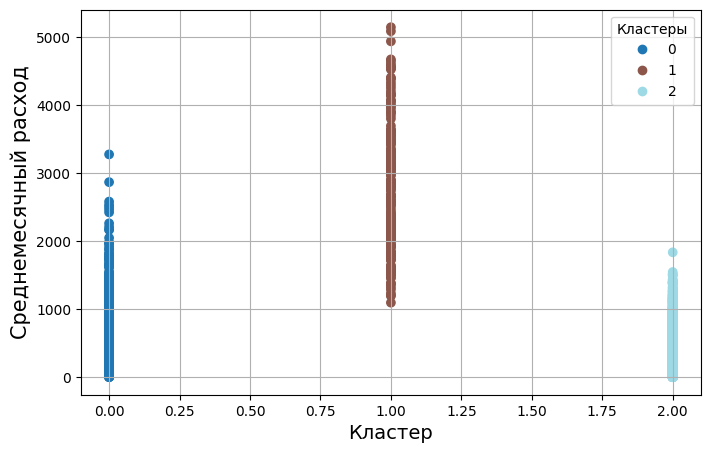

In [8]:
# Визуализация метода k-means

x= df['Кластер']
y = df['Среднемесячный расход']
fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(x, y, c=y_pred_km_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Кластер",fontsize=14)
plt.ylabel("Среднемесячный расход",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')
# Метод K-means разделил на 3 кластера и судя по графикам, давльно неплохо

#### Метод локтя

Text(0, 0.5, 'WCSS')

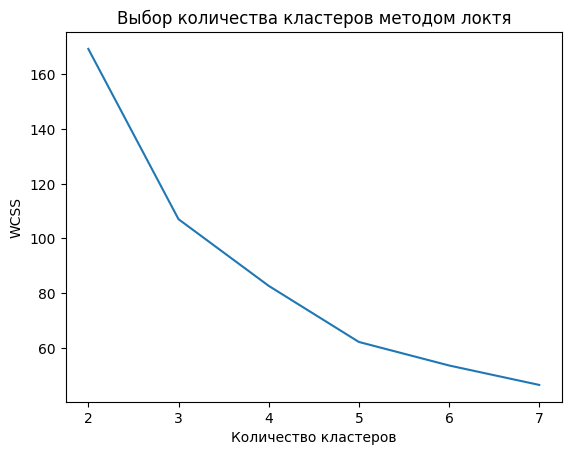

In [9]:
# Создадим список, в который будем записывать значение критерия качества k-means
criterion = []
# Количество кластеров будем изменять от 2 до 7
for k in range(2,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dfs[claster_tags])
    criterion.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,8), criterion)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
#Метод локтя показывает оптимальным - 3 числа кластеров

#### Визуализация кластеров

In [10]:
# для визуализации в двумерном пространстве из нескольких признаков сконструируем два,
# используя метод главных компонент
from sklearn.decomposition import PCA

dfs[["PC1", "PC2"]] = PCA(n_components=2).fit_transform(dfs)
dfs.head(3)
# выполняем конструирование признаков, поместим полученные значения
# в отдельные столбцы PC1, PC2

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,PC1,PC2
0,0.312849,0.126382,0.023029,-0.034612,0.224186
1,0.005587,0.345972,0.055322,0.022968,-0.121821
2,0.201117,0.104265,0.021504,-0.094553,0.127415


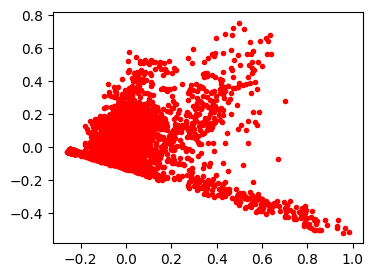

In [11]:
plt.rcParams["figure.figsize"] = 4, 3

plt.scatter(dfs["PC1"], dfs["PC2"], color="red", marker=".");
#Cогласно точечной диаграмме, точки очень неоднозначно распределены по кластерам и понятного мало чего

#### Оценка качества кластеризации

In [12]:
# КОД ARI
print(f"ARI (k-means) = {adjusted_rand_score(df['Количество SMS за месяц'], kmeans.labels_)}")
print(f"ARI (k-means) = {adjusted_rand_score(df['Количество звонков'], kmeans.labels_)}")
print(f"ARI (k-means) = {adjusted_rand_score(df['Среднемесячный расход'], kmeans.labels_)}")
print(f"ARI (k-means) = {adjusted_rand_score(df['Кластер'], kmeans.labels_)}")
# Вывод - ARI околонулевой. Это значит, что с т.ч. наших алгоритмов имеющиеся признаки не описывают принадлежность
# В заведомо правильном ARI получили 0.3, что говорит об некотором сходстве с истиной разбиения на кластеры

ARI (k-means) = 0.12031233772851782
ARI (k-means) = 0.010058108921639473
ARI (k-means) = 0.0002979643306527963
ARI (k-means) = 0.27290500257859995


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [13]:
#Silhouette
print(f"Силуэт (k-means) = {silhouette_score(dfs[claster_tags], kmeans.labels_)}")
#Вывод - Силуэт показывает значение близкое к единице, что говорит о среднем по качеству разбиении

Силуэт (k-means) = 0.3930703845790818


### 2. Алгоритм DBSCAN

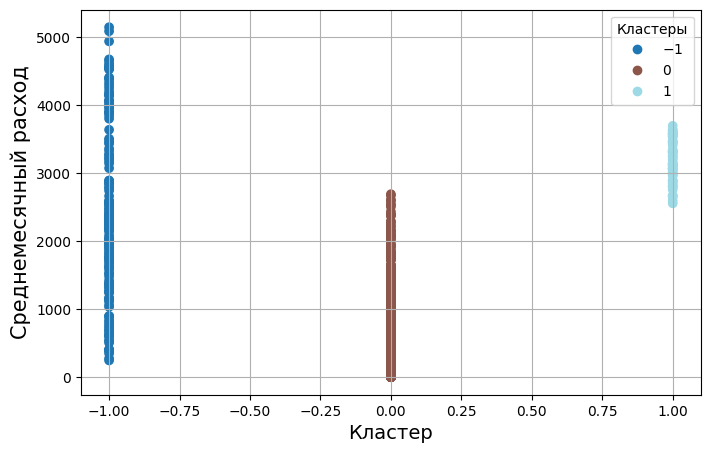

In [32]:
# сколько всего кластеров выделил DBSCAN?
model_dbscan_s = DBSCAN(eps=0.09, min_samples=20)
y_pred_dbscan_s = model_dbscan_s.fit_predict(dfs[claster_tags])
labels_dbscan = model_dbscan_s.labels_
model_dbscan_s.get_params()

df['Кластер_1'] = labels_dbscan

x= df['Кластер_1']
y = df['Среднемесячный расход']
fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(x, y, c=y_pred_dbscan_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Кластер",fontsize=14)
plt.ylabel("Среднемесячный расход",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')
#ДБСКАН смог выделить однозначно хотя бы два кластера и третий кластер похож на выброс!

In [33]:
pd.Series(labels_dbscan).value_counts()

,count
0,4274
-1,164
1,54


#### Оценка качества кластеризации

In [27]:
#ARI
print(f"ARI (DBSCAN) = {adjusted_rand_score(df['Количество SMS за месяц'], labels_dbscan)}")
print(f"ARI (DBSCAN) = {adjusted_rand_score(df['Количество звонков'], labels_dbscan)}")
print(f"ARI (DBSCAN) = {adjusted_rand_score(df['Среднемесячный расход'], labels_dbscan)}")
print(f"ARI (DBSCAN) = {adjusted_rand_score(df['Кластер_1'], labels_dbscan)}")
# Оценка качества метода метрикой ARI также дает информацию про отсутствие зависимости от колонок с кластерами
#Заведомо положительныый результат показал 1, следовательно разбиения истины

ARI (DBSCAN) = 0.012301503321071751
ARI (DBSCAN) = 0.001922956864422944
ARI (DBSCAN) = 3.884760484284296e-05
ARI (DBSCAN) = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [34]:
#Silhouette
print(f"Силуэт (DBSCAN) = {silhouette_score(dfs[claster_tags], labels_dbscan)}")
# Силуэт показывает значение 0,63, что означает разбиение носит средне-хороший характер

Силуэт (DBSCAN) = 0.6314331994337024


### 3. Иерархический агломеративный метод

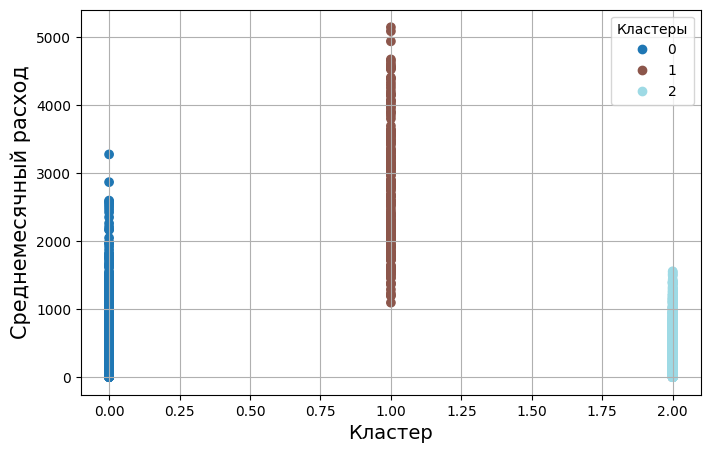

In [36]:
model_agglo3 = AgglomerativeClustering(n_clusters=3)
model_agglo3.fit(dfs[claster_tags])
y_pred_agglo3 = model_agglo3.fit_predict(dfs[claster_tags])
labels_agglo3 = model_agglo3.labels_

df['Кластер_2'] = labels_agglo3

x= df['Кластер_2']
y = df['Среднемесячный расход']
fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(x, y, c=y_pred_agglo3, cmap='tab20')
ax.grid(True)
plt.xlabel("Кластер",fontsize=14)
plt.ylabel("Среднемесячный расход",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')
#ИА метод, также, как и K-means выделил 3 кластера достаточно однозначно

In [37]:
#ARI
print(f"ARI (Aglomerative) = {adjusted_rand_score(df['Количество SMS за месяц'], model_agglo3.labels_)}")
print(f"ARI (Aglomerative) = {adjusted_rand_score(df['Количество звонков'], model_agglo3.labels_)}")
print(f"ARI (Aglomerative) = {adjusted_rand_score(df['Среднемесячный расход'], model_agglo3.labels_)}")
print(f"ARI (Aglomerative) = {adjusted_rand_score(df['Кластер_2'], model_agglo3.labels_)}")
#Метрики ARI показывают отсутствие принадлежности  по имеющимся признакам

ARI (Aglomerative) = 0.08298442241254435
ARI (Aglomerative) = 0.002088763190675735
ARI (Aglomerative) = 8.58057321346289e-05
ARI (Aglomerative) = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [38]:
print(f"Силуэт (Aglomerative) = {silhouette_score(dfs, model_agglo3.labels_)}")
#Метрика силуэт показывает о среднем по качеству разбиении

Силуэт (Aglomerative) = 0.40755364364814123


#Подбор оптимального числа кластеров

In [39]:
for clusters_count in range(2, 10):
  # k-means
  model_kmeans = KMeans(n_clusters=clusters_count, n_init=10, random_state=0)
  model_kmeans.fit(dfs[claster_tags])
  labels_kmeans = model_kmeans.labels_

  # иерархический агломеративный метод
  model_agglo = AgglomerativeClustering(n_clusters=clusters_count)
  model_agglo.fit(dfs[claster_tags])
  labels_agglo = model_agglo.labels_

  # вычислим силуэт
  print(f"Силуэт (k-means {clusters_count}) = {silhouette_score(dfs[claster_tags], labels_kmeans)}")
  print(f"Силуэт (аглом. {clusters_count}) = {silhouette_score(dfs[claster_tags], labels_agglo)}\n")

  #Вывод: Силуэт максимальный при 2 кластерах для двух методов

Силуэт (k-means 2) = 0.6165904743318926
Силуэт (аглом. 2) = 0.6557708831384235

Силуэт (k-means 3) = 0.5094503416591726
Силуэт (аглом. 3) = 0.39371441056903483

Силуэт (k-means 4) = 0.406231101145626
Силуэт (аглом. 4) = 0.38457714632421885

Силуэт (k-means 5) = 0.38553253551904837
Силуэт (аглом. 5) = 0.38983269865087206

Силуэт (k-means 6) = 0.4046589778968578
Силуэт (аглом. 6) = 0.35821172683709407

Силуэт (k-means 7) = 0.3952397931737959
Силуэт (аглом. 7) = 0.3617548364397412

Силуэт (k-means 8) = 0.3752803923864724
Силуэт (аглом. 8) = 0.347047665879824

Силуэт (k-means 9) = 0.382939422862601
Силуэт (аглом. 9) = 0.34498660639163986

